In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support

In [2]:
#pip install --upgrade joblib

In [3]:
def plot_vimp(poss, X, Y, feature_names):
    
    from    sklearn.tree            import  DecisionTreeClassifier
    from    sklearn.ensemble        import  RandomForestClassifier        
    from    sklearn.ensemble        import  AdaBoostClassifier
    from    xgboost                 import  XGBClassifier  
    
    tex     =  " (Normalized) total reduction of the criterion brought by that feature."
        
    if poss == 0:
        name   =   "Decision Tree"
        clf    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
        clf.fit(X, Y)
    elif poss == 1:
        name   =   "Random Forest"        
        clf    =   RandomForestClassifier()
        clf.fit(X, Y)  
    elif poss == 2:
        name   =   "GradientBoost"             
        clf    =   GradientBoostingClassifier()
        clf.fit(X, Y)          
    elif poss == 3:
        name   =   "AdaBoost"        
        clf    =   AdaBoostClassifier()
        clf.fit(X, Y)
    elif poss==4:
        name  =     "XGBoost"
        clf   =      XGBClassifier()
        clf.fit(X, Y)
        
    ###
    ### Variable importance Plot
    ###
    importances =  clf.feature_importances_
    indices     =  np.argsort(importances)
    titlex      =  'Feature Importances for '+ name
    plt.title(titlex)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance :\n' + tex)
    plt.show

In [4]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
feature_names         =  ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',\
                          'Departure/Arrival time convenient','Ease of Online booking', 'Online boarding',\
                          'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling',\
                          'Checkin service', 'Cleanliness', 'Inflight service']

In [6]:
trn=pd.read_csv(r"C:\Users\Vineha\Downloads\sneha_project\db\train_16_cols.csv")
trn

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,1.0,0.0,1.0,1.0,3.0,5.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,5.0,0.0
1,1.0,1.0,0.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2,0.0,0.0,0.0,0.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,4.0,0.0
3,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,2.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,1.0,1.0,0.0,1.0,1.0,5.0,1.0,1.0,3.0,5.0,1.0,2.0,4.0,4.0,3.0,0.0
97406,0.0,0.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0
97407,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,1.0
97408,0.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,3.0,4.0,0.0


In [7]:
tst=pd.read_csv(r"C:\Users\Vineha\Downloads\sneha_project\db\test_16_cols.csv")
tst

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,1.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,3.0,0.0
2,1.0,1.0,0.0,1.0,2.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,5.0,0.0
3,1.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
4,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0.0,0.0,1.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,0.0,5.0,4.0,1.0,0.0
32466,1.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,4.0,5.0,4.0,0.0
32467,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0,0.0
32468,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0,1.0


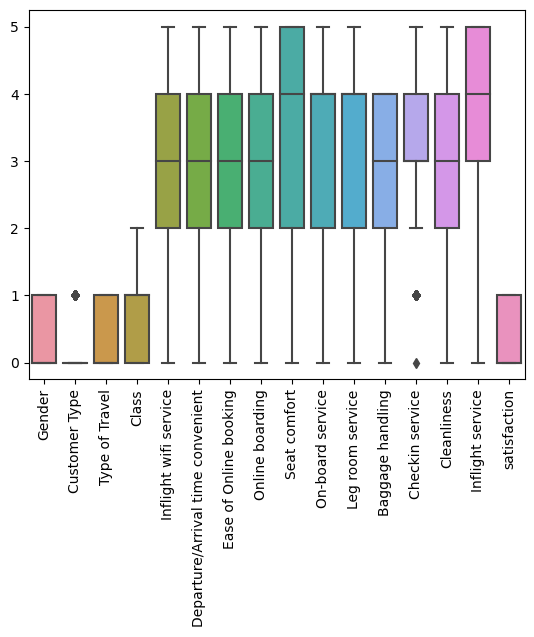

In [8]:
sns.boxplot(data=trn)
plt.xticks(rotation=90)
plt.show()

In [9]:
num=trn.select_dtypes(include=np.number)
cat=trn.select_dtypes(exclude=np.number)

In [10]:
x=trn.drop('satisfaction',axis=1)
y=trn['satisfaction']


In [11]:

ytrain=trn['satisfaction']

In [12]:
xtest=tst.drop('satisfaction',axis=1)
ytest=tst['satisfaction']

In [13]:
xtrain=x

In [14]:
xtest

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service
0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,3.0
2,1.0,1.0,0.0,1.0,2.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,5.0
3,1.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0
4,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0.0,0.0,1.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,0.0,5.0,4.0,1.0
32466,1.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,4.0,5.0,4.0
32467,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0
32468,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0


In [15]:
def per_measures(model,test,pred):
    accuracy=accuracy_score(test,pred)
    f1score=f1_score(test,pred)
    recall=recall_score(test,pred)
    precision=precision_score(test,pred)
    weighted_f1score=f1_score(test, pred,average='weighted')
    return(accuracy,recall,precision,f1score,weighted_f1score)

In [16]:
def update_performance (name, model,test,pred):
    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'            : name,
                                    'Accuracy'         : per_measures(model,test,pred)[0],
                                    'Recall'           : per_measures(model,test,pred)[1],
                                    'Precision'        : per_measures(model,test,pred)[2],
                                    'F1 Score'         : per_measures(model,test,pred)[3],
                                    'Weighted Avg F1 Score': per_measures(model,test,pred)[4]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [17]:
def update_performances_train (name, model,train,pred):
    # assign 'comp_perf' as global variable
    global perf_score_training

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score_training = perf_score_training.append({'Model'       : name,
                                    'Accuracy'                      : per_measures(model,train,pred)[0],
                                    'Recall'                        : per_measures(model,train,pred)[1],
                                    'Precision'                     : per_measures(model,train,pred)[2],
                                    'F1 Score'                      : per_measures(model,train,pred)[3],
                                    'Weighted Avg F1 Score'         : per_measures(model,train,pred)[4]       
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [18]:
perf_score=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

In [19]:
perf_score_training=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

## Logistic Regression

In [19]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

[[16558  1771]
 [ 2334 11807]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [20]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
predicted_xtrain_lr=lr.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_lr))
print(measure_train)
f1 = f1_score(ytest, ypred_lr, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_lr, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[49741  5382]
 [ 6964 35323]]
f1_score:  0.8512386736070947
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410

F1 Score: 0.8732478461770414
F1 Score_train: 0.87294587338337


# TUNED LOGISTIC REGRESSION

In [22]:

logistic_regression = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solver type
}

# Create the GridSearchCV object
grid_search_log = GridSearchCV(logistic_regression, param_grid, cv=5,  scoring='f1_macro')

# Fit the model to the training data
grid_search_log.fit(xtrain,ytrain)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1_macro')

In [23]:
# Get the best parameters and the best estimator
best_params =grid_search_log.best_params_
best_estimator = grid_search_log.best_estimator_
print(best_params,best_estimator)

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} LogisticRegression(C=0.01, penalty='l1', solver='saga')


In [26]:
ypred_tuned=grid_search_log.predict(xtest)
print(classification_report(ytest,ypred_tuned))


              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470

F1 Score: 0.8736328707662137


In [43]:
predicted_xtrain_logt=grid_search_log.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_logt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_logt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_logt))
print(measure_train)
f1 = f1_score(ytest, ypred_tuned, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_logt, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[49783  5340]
 [ 6967 35320]]
f1_score:  0.8516281480945666
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410

F1 Score: 0.8745187328306693
F1 Score_train: 0.8733373529613404


## K nearest neighbour Model 

In [28]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     18329
         1.0       0.94      0.90      0.92     14141

    accuracy                           0.93     32470
   macro avg       0.94      0.93      0.93     32470
weighted avg       0.94      0.93      0.93     32470



In [29]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
predicted_xtrain_knn=knn.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print(measure_train)
f1 = f1_score(ytest, ypred_knn, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_knn, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[53657  1466]
 [ 2988 39299]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     55123
         1.0       0.96      0.93      0.95     42287

    accuracy                           0.95     97410
   macro avg       0.96      0.95      0.95     97410
weighted avg       0.95      0.95      0.95     97410

F1 Score: 0.9347978541159505
F1 Score_train: 0.9541680982386618


# TUNED KNN

In [ ]:
knn=KNeighborsClassifier()
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3,5,7,9,311,313],
    'weights': ['uniform', 'distance'],  # None added for weights parameter
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance  # None added for leaf_size parameter
}

# Create the GridSearchCV object with 'f1_macro' as the scoring metric
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro',n_jobs=-1)

# Fit the model to the training data
grid_search_knn.fit(xtrain,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_knn.best_params_
print(best_params)

In [ ]:
ypred_tuned=grid_search_knn.predict(xtest)
print(classification_report(ytest,ypred_tuned))


In [ ]:
ypred_tuned=grid_search_knn.predict(xtest)
print(classification_report(ytest,ypred_tuned))
predicted_xtrain_knnt=grid_search_knn.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knnt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knnt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_knnt))
print(measure_train)

## Gaussian Naive Bayes Model

In [31]:
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb=gnb_model.predict(xtest)
print(classification_report(ytest,ypred_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     18329
         1.0       0.88      0.82      0.85     14141

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470



In [32]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [47]:
predicted_xtrain_gnb=gnb_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)
f1 = f1_score(ytest, ypred_gnb, average="weighted")
print("F1 Score avg:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_gnb, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410

F1 Score avg: 0.8745187328306693
F1 Score_train: 0.8755128632081938


# TUNED GAUSSIN

In [34]:
gnb = GaussianNB()

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.5, 0.3]]
}

# Create the GridSearchCV object with 'f1_macro' as the scoring metric
grid_search_gnb = GridSearchCV(gnb, param_grid, cv=5, scoring='f1_macro')

# Fit the model to the training data
grid_search_gnb.fit(xtrain,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_gnb.best_params_
best_estimator = grid_search_gnb.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'priors': None, 'var_smoothing': 1e-09}
Best Estimator: GaussianNB()


In [48]:
ypred_tuned=grid_search_gnb.predict(xtest)
print(classification_report(ytest,ypred_tuned))
predicted_xtrain_gnb=grid_search_gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)
f1 = f1_score(ytest, ypred_tuned, average="weighted")
print("F1 Score_avg:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_gnb, average="weighted")
print("F1 Score_train:", f1_train)

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     18329
         1.0       0.88      0.82      0.85     14141

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410

F1 Score_avg: 0.8745187328306693
F1 Score_train: 0.8755128632081938


## Bernoulli Naive Bayes Model

In [36]:
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain,ytrain)
ypred_bnb=bnb_model.predict(xtest)
print(classification_report(ytest,ypred_bnb))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     18329
         1.0       0.73      0.79      0.76     14141

    accuracy                           0.78     32470
   macro avg       0.78      0.78      0.78     32470
weighted avg       0.78      0.78      0.78     32470



In [39]:
predicted_xtrain_bnb=bnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bnb))
print(measure_train)
f1 = f1_score(ytest, ypred_bnb, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_bnb, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[42598 12525]
 [ 9113 33174]]
f1_score:  0.7540745118541585
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     55123
         1.0       0.73      0.78      0.75     42287

    accuracy                           0.78     97410
   macro avg       0.77      0.78      0.78     97410
weighted avg       0.78      0.78      0.78     97410

F1 Score: 0.779584100936175
F1 Score_train: 0.7786266109391231


# TUNNING BERNOULLI 

In [49]:
bnb = BernoulliNB()

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'binarize': [None, 0.1, 0.5],  # Binarization threshold
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create the GridSearchCV object with 'f1_macro' as the scoring metric
grid_search_bnb = GridSearchCV(bnb, param_grid, cv=5, scoring='f1_macro')

# Fit the model to the training data
grid_search_bnb.fit(xtrain,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_bnb.best_params_
best_estimator = grid_search_bnb.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'alpha': 0.1, 'binarize': 0.1, 'fit_prior': True}
Best Estimator: BernoulliNB(alpha=0.1, binarize=0.1)


In [50]:
ypred_tuned=grid_search_bnb.predict(xtest)
print(classification_report(ytest,ypred_tuned))
predicted_xtrain_bnb=grid_search_gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bnb))
print(measure_train)
f1 = f1_score(ytest, ypred_tuned, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_bnb, average="weighted")
print("F1 Score_train:", f1_train)

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     18329
         1.0       0.73      0.79      0.76     14141

    accuracy                           0.78     32470
   macro avg       0.78      0.78      0.78     32470
weighted avg       0.78      0.78      0.78     32470


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410

F1 Score: 0.779584100936175
F1 Score_train: 0.8755128632081938


## Decision Tree

In [34]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)
ypred_dt=dt_model.predict(xtest)
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

[[17437   892]
 [  918 13223]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.94      0.94      0.94     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [35]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [53]:
predicted_xtrain_dt=dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)
f1 = f1_score(ytest, ypred_dt, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_dt, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[55104    19]
 [  291 41996]]
f1_score:  0.9963227444188749
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

F1 Score: 0.9445637650327771
F1 Score_train: 0.9968163573510067


## Tuned Decision Tree 

In [54]:


# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
      'max_features': [None, 'sqrt', 'log2'] 
}

# Create the GridSearchCV object with a scoring metric (e.g., accuracy)
grid_search_dt = GridSearchCV(dt_classifier, param_grid, cv=5,scoring='f1_macro')

# Fit the model to the training data
grid_search_dt.fit(xtrain,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_dt.best_params_
best_estimator = grid_search_dt.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Estimator: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10)


In [55]:
ypred_tuned=grid_search_dt.predict(xtest)
print(classification_report(ytest,ypred_tuned))
predicted_xtrain_dt=grid_search_dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)
f1 = f1_score(ytest, ypred_tuned, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_dt, average="weighted")
print("F1 Score_train:", f1_train)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.93      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470


Training data
[[54340   783]
 [ 1613 40674]]
f1_score:  0.97138899503248
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.98      0.96      0.97     42287

    accuracy                           0.98     97410
   macro avg       0.98      0.97      0.97     97410
weighted avg       0.98      0.98      0.98     97410

F1 Score: 0.9506961114853165
F1 Score_train: 0.9753729424261918


## Random Forest Model 

In [25]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [26]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)
f1 = f1_score(ytest, ypred_rf, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_rf, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[55012   111]
 [  199 42088]]
f1_score:  0.9963307530241696
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

F1 Score: 0.9579087602499876
F1 Score_train: 0.9968171869188353


## Tuned Random Forest

In [21]:

rf_classifier = RandomForestClassifier()

param_dist ={     'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object with a scoring metric (e.g., accuracy)
grid_search_rf = GridSearchCV(rf_classifier, param_dist, cv=5, scoring='f1_macro', n_jobs=2)


# Fit the model to the training data
grid_search_rf.fit(xtrain,ytrain)

# Get the best parameters and the best estimator
best_params = grid_search_rf.best_params_


print("Best Parameters:", best_params)

KeyboardInterrupt: 

In [ ]:
ypred_tuned=grid_search_rf.predict(xtest)
print(classification_report(ytest,ypred_tuned))
predicted_xtrain_rf=grid_search_rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)
f1 = f1_score(ytest, ypred_tuned, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_rf, average="weighted")
print("F1 Score_train:", f1_train)

## Random Forest with Out of Bag

In [31]:
best_params = grid_search_rf.best_params_
rfoob = RandomForestClassifier(**best_params, oob_score=True, random_state=10)
rfoob.fit(xtrain, ytrain)
ypred_rfoob = rfoob.predict(xtest)
f1 = f1_score(ytest, ypred_rfoob)
print("F1 Score:", f1)
print(classification_report(ytest, ypred_rfoob))


NameError: name 'grid_search_rf' is not defined

In [ ]:
predicted_xtrain_rfoob=rfoob.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfoob)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfoob)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfoob))
print(measure_train)

In [ ]:
print('\nTraining Data ')
update_performances_train(name='Random Forest with out of bag',
                  model=rfoob,
                  train=ytrain,
                  pred=predicted_xtrain_rfoob)
perf_score_training

In [ ]:
print('\nTesting Data ')
update_performance(name='Random Forest with out of bag',
                  model=rfoob,
                  test=ytest,
                  pred=ypred_rfoob)
perf_score

## Tunned Knn

In [ ]:
knn=KNeighborsClassifier(n_neighbors=311)
bc_knn=BaggingClassifier(base_estimator=knn,random_state=10)
knn_model=bc_knn.fit(xtrain,ytrain)
ypred_bc_knn=knn_model.predict(xtest)
print(classification_report(ytest,ypred_bc_knn))

In [ ]:
predicted_xtrain_bc_knn=knn_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bc_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bc_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bc_knn))
print(measure_train)

In [ ]:
print('\nTraining Data ')
update_performances_train(name='Tunned knn',
                  model=knn,
                  train=ytrain,
                  pred=predicted_xtrain_bc_knn)
perf_score_training

In [ ]:
print('\nTesting Data ')
update_performance(name='Tunned knn',
                  model=knn,
                  test=ytest,
                  pred=ypred_bc_knn)
perf_score

## Ada Boosting 

In [36]:
ada=AdaBoostClassifier(dt,random_state=10)
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print(classification_report(ytest,ypred_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [37]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 10}

In [38]:
predicted_xtrain_ada=ada.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)
f1 = f1_score(ytest, ypred_ada, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_ada, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[55010   113]
 [  197 42090]]
f1_score:  0.996330926736892
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

F1 Score: 0.9500548454006937
F1 Score_train: 0.9968172046866901


In [ ]:
print('\nTraining Data ')
update_performances_train(name='Adaboost Classifier',
                  model=ada,
                  train=ytrain,
                  pred=predicted_xtrain_ada)
perf_score_training

In [ ]:
print('\nTesting Data ')
update_performance(name='Adaboost Classifier',
                  model=ada,
                  test=ytest,
                  pred=ypred_ada)
perf_score

# TUNED ADA BOOST

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search_adaboost.fit(xtrain, ytrain)

# Get the best parameters
best_params_adaboost = grid_search_adaboost.best_params_

# Create the AdaBoostClassifier with the best parameters
adaboost_best = AdaBoostClassifier(**best_params_adaboost)

# Fit the best model to the training data
adaboost_best.fit(xtrain, ytrain)

# Make predictions on the test set
ypred_adaboost = adaboost_best.predict(xtest)

# Evaluate the performance
accuracy = accuracy_score(ytest, ypred_adaboost)
print("Best Parameters:", best_params_adaboost)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy on Test Set: 0.9269171542962735


In [42]:
ypred_ada=adaboost_best.predict(xtest)
print(classification_report(ytest,ypred_ada))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     18329
         1.0       0.93      0.90      0.92     14141

    accuracy                           0.93     32470
   macro avg       0.93      0.92      0.93     32470
weighted avg       0.93      0.93      0.93     32470



In [43]:
predicted_xtrain_ada=adaboost_best.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)
f1 = f1_score(ytest, ypred_ada, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_ada, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[51898  3225]
 [ 3974 38313]]
f1_score:  0.9141186996719356
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     55123
         1.0       0.92      0.91      0.91     42287

    accuracy                           0.93     97410
   macro avg       0.93      0.92      0.92     97410
weighted avg       0.93      0.93      0.93     97410

F1 Score: 0.9268086651973835
F1 Score_train: 0.9260150607244825


## Gradient Boost Classifier 

In [44]:
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred_gbc=rf.predict(xtest)
print(classification_report(ytest,ypred_gbc))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [45]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
predicted_xtrain_gbc=gbc.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)
f1 = f1_score(ytest, ypred_gbc, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_gbc, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[52946  2177]
 [ 3447 38840]]
f1_score:  0.9324882358590224
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     55123
         1.0       0.95      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410

F1 Score: 0.958648554349541
F1 Score_train: 0.9421533158056444


# TUNNING GRADIANT BOOST

In [51]:
# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

# Create the GradientBoostingClassifier
gradient_boost_classifier = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search_gradient_boost = GridSearchCV(gradient_boost_classifier, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search_gradient_boost.fit(xtrain, ytrain)

# Get the best parameters
best_params_gradient_boost = grid_search_gradient_boost.best_params_

# Create the GradientBoostingClassifier with the best parameters
gradient_boost_best = GradientBoostingClassifier(**best_params_gradient_boost)

# Fit the best model to the training data
gradient_boost_best.fit(xtrain, ytrain)

# Make predictions on the test set
ypred_gradient_boost = gradient_boost_best.predict(xtest)

# Evaluate the performance
accuracy = accuracy_score(ytest, ypred_gradient_boost)
print("Best Parameters:", best_params_gradient_boost)
print("Accuracy on Test Set:", accuracy)
print(classification_report(ytest,ypred_gradient_boost))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy on Test Set: 0.9597782568524792
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [52]:
predicted_xtrain_gra=gradient_boost_best.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gra)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gra))
print(measure_train)
f1 = f1_score(ytest, ypred_ada, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_gra, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[51898  3225]
 [ 3974 38313]]
f1_score:  0.9567962738436792
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.94      0.96     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410

F1 Score: 0.9268086651973835
F1 Score_train: 0.9629817635880128


## XG Boost Classifier 

In [53]:
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print(classification_report(ytest,ypred_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [54]:
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [55]:
predicted_xtrain_xg=xg.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)
f1 = f1_score(ytest, ypred_xg, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_xg, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[54191   932]
 [ 2114 40173]]
f1_score:  0.9634737145049885
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410

F1 Score: 0.9610067452848605
F1 Score_train: 0.9686743513346299


In [ ]:
print('\nTraining Data ')
update_performances_train(name='XGBoost Classifier',
                  model=xg,
                  train=ytrain,
                  pred=predicted_xtrain_xg)
perf_score_training

In [ ]:
print('\nTesting Data')
update_performance(name='XGBoost Classifier',
                  model=xg,
                  test=ytest,
                  pred=ypred_xg)
perf_score

# TUNNING XG BOOST

In [60]:
import xgboost as xgb
# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(xtrain, ytrain)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Create the XGBoost classifier with the best parameters
xgb_best = xgb.XGBClassifier(**best_params_xgb)

# Fit the best model to the training data
xgb_best.fit(xtrain, ytrain)

# Make predictions on the test set
ypred_xgb = xgb_best.predict(xtest)

# Evaluate the performance
accuracy = accuracy_score(ytest, ypred_xgb)
print("Best Parameters:", best_params_xgb)
print("Accuracy on Test Set:", accuracy)
print(classification_report(ytest,ypred_xgb))

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Accuracy on Test Set: 0.9516784724360948
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     18329
         1.0       0.96      0.93      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [61]:
predicted_xtrain_xg=xgb_best.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)
f1 = f1_score(ytest, ypred_xg, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_xg, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[53542  1581]
 [ 3060 39227]]
f1_score:  0.9441482640351405
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     55123
         1.0       0.96      0.93      0.94     42287

    accuracy                           0.95     97410
   macro avg       0.95      0.95      0.95     97410
weighted avg       0.95      0.95      0.95     97410

F1 Score: 0.9610067452848605
F1 Score_train: 0.9522473677988339


## Stacking 

In [62]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
base_learner=[('lr_model', lr ),('knn_model', knn),('dt_model', dt)]
stack=StackingClassifier(estimators=base_learner, final_estimator=GaussianNB())
stack.fit(xtrain,ytrain)
ypred_stack=stack.predict(xtest)
print(classification_report(ytest,ypred_stack))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.93      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.94      0.95      0.94     32470
weighted avg       0.95      0.95      0.95     32470



In [64]:
predicted_xtrain_stack=stack.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_stack)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_stack)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_stack))
print(measure_train)
f1 = f1_score(ytest, ypred_stack, average="weighted")
print("F1 Score:", f1)
f1_train= f1_score(ytrain,predicted_xtrain_stack, average="weighted")
print("F1 Score_train:", f1_train)


Training data
[[54543   580]
 [  167 42120]]
f1_score:  0.9912104204172402
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     55123
         1.0       0.99      1.00      0.99     42287

    accuracy                           0.99     97410
   macro avg       0.99      0.99      0.99     97410
weighted avg       0.99      0.99      0.99     97410

F1 Score: 0.945513370766888
F1 Score_train: 0.9923355979184745


In [ ]:
# here random forest and xg boost is giving better model 

## Variable Importance plot of decision Tree

In [ ]:
plot_vimp(0, x, y, feature_names)

## Variable Importance plot of Random Forest

In [ ]:
plot_vimp(1,x,y,feature_names)

## Variable Importance plot of GradientBoost

In [ ]:
plot_vimp(2,x,y,feature_names)

## Variable Importance plot of AdaBoost

In [ ]:
plot_vimp(3,x,y,feature_names)

## Variable Importance plot of XGBoost

In [ ]:
plot_vimp(4,x,y,feature_names)

## Confusion Matrix and ROC curve of Logistic Regression

In [ ]:
con_lr=confusion_matrix(ytest,ypred_lr)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_lr)

## Confusion Matrix and ROC curve of KNeighbour 

In [ ]:
con_knn=confusion_matrix(ytest,ypred_knn)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_knn)

## Confusion Matrix and ROC curve of Gaussian Naive Bayes

In [ ]:
con_knn=confusion_matrix(ytest,ypred_gnb)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gnb)

## Confusion Matrix and ROC curve of Decision Tree

In [ ]:
con_knn=confusion_matrix(ytest,ypred_dt)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_dt)

## Confusion Matrix and ROC curve of Random Forest

In [ ]:
con_knn=confusion_matrix(ytest,ypred_rf)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_rf)

## Confusion Matrix and ROC curve of Gradient Boost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_gbc)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gbc)

## Confusion Matrix and ROC curve of AdaBoost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_ada)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_ada)

## Confusion Matrix and ROC curve of XGBoost

In [ ]:
con_knn=confusion_matrix(ytest,ypred_xg)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_xg)

## Tuning Random Forest by changing max_depth

In [ ]:
rf=RandomForestClassifier(max_depth=8, min_samples_split=4)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

In [ ]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)

In [ ]:
rf=RandomForestClassifier(max_depth=15, min_samples_split=10)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

In [ ]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)

In [ ]:
rf=RandomForestClassifier(max_depth=20, min_samples_split=15)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

In [ ]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)

In [ ]:
rf=RandomForestClassifier(max_depth=19, min_samples_split=16)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

In [ ]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)

In [ ]:
rf=RandomForestClassifier(max_depth=5, min_samples_split=3)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

In [ ]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)